In [ ]:
#pip install textblob
#pip install googletrans
#pip install deep-translator



In [4]:
from textblob import TextBlob
from textblob import Word
from deep_translator import GoogleTranslator


# Türkçe metin
text = "Bu filmi gerçekten çok beğendim, harikaydı!"
       
# Türkçe metni İngilizceye çevir
translated_text = GoogleTranslator(source='tr', target='en').translate(text)

# Çevirilen metni TextBlob ile analiz et     
blob = TextBlob(translated_text)

# Duygu analizi
print(f"Orijinal Metin: {text}")
print(f"Çevrilmiş Metin: {translated_text}")
print(f"Duygu Puanı: {blob.sentiment.polarity}")  # -1 ile 1 arasında bir değer
print(f"Duygu Yoğunluğu: {blob.sentiment.subjectivity}")  # 0 ile 1 arasında bir değer

print(blob.sentiment)

Orijinal Metin: Bu filmi gerçekten çok beğendim, harikaydı!
Çevrilmiş Metin: I really liked this movie, it was great!
Duygu Puanı: 0.8
Duygu Yoğunluğu: 0.775
Sentiment(polarity=0.8, subjectivity=0.775)


TextBlob varsayılan olarak İngilizce duygu analizi desteklemekte ve dil çevirisi olmadan Türkçe duygu analizi yapamamaktadır. Ancak TextBlob’a Türkçe dil desteği eklemek için bazı dil kaynaklarını manuel olarak ekleyerek bu durumu aşabiliriz. Özellikle Türkçe bir duygu sözlüğü kullanarak veya TextBlob için farklı dillerde duygu analizini destekleyen ek kütüphanelerle çalışarak doğrudan Türkçe metinler üzerinde analiz yapabilirsiniz.

Aşağıda, çevirisiz Türkçe duygu analizi için textblob-fr gibi ek paketlerin ve Türkçe duygu sözlüklerinin kullanımını gösteren örnek bir yöntem bulunmaktadır:

1. TextBlob + Ek Türkçe Duygu Sözlüğü Kullanımı
Bu yöntemde, Türkçe metinler için bir duygu sözlüğü hazırlayarak TextBlob duygu analizi işlevini genişletiyoruz. Bunun için, Türkçe kelimeleri ve duygu puanlarını içeren bir CSV dosyası kullanabiliriz. Örneğin, olumlu kelimeler +1, olumsuz kelimeler -1 gibi puanlanabilir.

Örnek CSV Dosyası (turkish_sentiment_lexicon.csv)

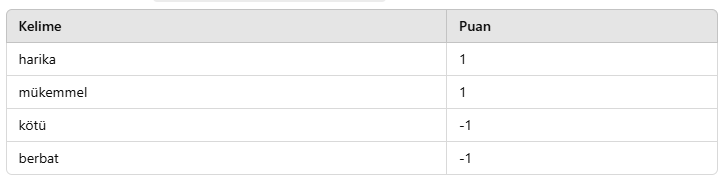



In [ ]:
text = "Bu filmi gerçekten çok beğendim, harikaydı!"
blob = TextBlob(text)
words = blob.split(" ")
print(words)

In [7]:
import pandas as pd
from textblob import TextBlob

# Türkçe duygu sözlüğünü yükleyin
sentiment_lexicon = pd.read_csv("turkish_sentiment_lexicon.csv")

# TextBlob'u genişletmek için bir yardımcı fonksiyon
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = 0
    words = blob.split(" ")
    
    for word in words:
        match = sentiment_lexicon[sentiment_lexicon['Kelime'] == word]
        if not match.empty:
            polarity += match['Puan'].values[0]
    
    return polarity

# Test metni
text = "Bu film gerçekten çok harikaydı, mükemmel bir deneyim oldu!"

# Duygu analizi
print(f"Metin: {text}")
print(f"Duygu Puanı: {analyze_sentiment(text)}")  # Pozitif değer olumlu, negatif değer olumsuz


Metin: Bu film gerçekten çok harikaydı, mükemmel bir deneyim oldu!
Duygu Puanı: 1


Açıklama 

Kelime sütununda duygu analizi yaparken kontrol edilecek Türkçe kelimeler bulunur.
Puan sütununda her kelimenin duygu puanı yer alır:
1 gibi pozitif değerler, kelimenin olumlu duygu içerdiğini ifade eder.
-1 gibi negatif değerler, kelimenin olumsuz duygu içerdiğini gösterir.
Bu yapı sayesinde Türkçe metinler üzerinde TextBlob kullanarak hızlı bir şekilde temel duygu analizleri yapabilirsiniz. İhtiyaca göre daha fazla olumlu veya olumsuz kelime ekleyerek sözlüğü genişletebilirsiniz.